# 富士下山問題

勾配降下法は山や谷を下ることに例えられます。

富士山の標高データを 最小化したい目的関数 に見立てて、富士山からの下山プログラムを作成することで勾配降下法を学びます。

左から順番に**「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」**となっています。

標高と距離の単位はメートルです。300地点のデータです。




In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[0:10])
print(fuji[:,3][150])
print(fuji[0])



[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]
2146.01
[  0.        35.134141 139.132082   0.         0.      ]


## 【問題1】データの可視化


Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

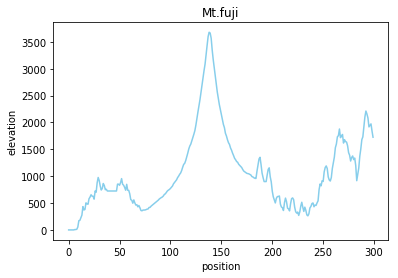

In [4]:
# 回答
plt.title("Mt.fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(fuji[:,0],fuji[:,3],color='skyblue')
plt.show()


In [212]:
# change_elevation = fuji[:,3][1:] - fuji[:,3][:-1] 
# # print(change_elevation)
# # print(len(change_elevation))

# gradient_now_point = fuji[70, 0] - fuji[69, 0]
# gradient_elevation = fuji[8, 3] - fuji[7, 3]

# print("今いる地点ー勾配")
# print(gradient_now_point)
# print("標高ー勾配")
# print(gradient_elevation)

## 【問題2】ある地点の勾配を計算する関数を作成


「二次元配列と勾配問題」では各地点での勾配を最初に求めました。

しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

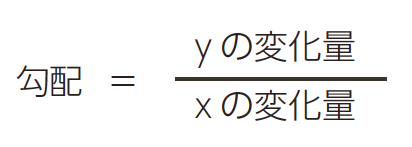


In [213]:
def gradient_point_func(now_point):
    """ 今いる地点を入力すると隣の地点との勾配を求める関数
    
    Parameteres:
            now_point int:現在の地点を入力
    
    Returns:
           gradient  int: 勾配を返す
    
    """
    
    # 標高の変化量(y)
    change_elevation = fuji[:,3][now_point] - fuji[:,3][now_point-1] 
    
    # その地点の変化量(x)
    change_now_point = fuji[:,0][now_point] - fuji[:,0][now_point-1]
    
    # 勾配＝　yの変化量÷xの変化量
    gradient = change_elevation / change_now_point
    
    return gradient


gradient = gradient_point_func(150)


# 回答
print("今いる地点と隣との勾配は{}です".format(gradient))



今いる地点と隣との勾配は-94.9699999999998です


## 【問題3】移動先の地点を計算する関数を作成


今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと** 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 **となります。


「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。

$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。

機械学習の分野では学習率という名前で呼ばれます。

この値によって下り方が変わります。**ここでは例えば0.2に設定してください。**


《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。

そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。

例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。


Python tutorial エラーと例外


**《ハイパーパラメータとは》**


機械学習手法において、その手法自身では最適化が行えない値のことです。

値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。

最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [162]:
import math

# print(gradient)

def any_moving_point(gradient):
    """ 今いる地点の勾配をもとに、次の地点を計算する関数
    
    Parameters:
            gradient: 今いる地点の勾配
    
    return:
            any_point: 次の地点
    
    """
    
    any_point = now_point - 0.2 * gradient
    
    return any_point

any_point = any_moving_point(gradient)

# 回答
print("移動先の地点は{}です".format(math.floor(any_point)))
    

移動先の地点は154です


## 【問題4】山を下る関数を作成


山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。

移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。

ここから山を下っていきましょう。


《実装上の注意》

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。

移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [178]:
def fuji_down_hill(any_point=136):
    """ 任意の地点を入力、次の移動先地点をリストへ格納して出力する関数
    Parameters
        最初の地点:int
        any_point: 136
    
    return
        次の地点を繰り返し格納するリスト
        destination_list = []
    """
    destination_list = [any_point]
    # 仮に３０回繰り返すこととする
    for i in range(50):
        # y変化量
        change_elevation = fuji[:,3][int(any_point)] - fuji[:,3][int(any_point)-1] 
        # x変化量
        change_now_point = fuji[:,0][int(any_point)] - fuji[:,0][int(any_point)-1]
        # 勾配
        gradient = change_elevation / change_now_point
        
        # 次の地点
        next_point = any_point - 0.2 * gradient
        
        destination_list.append(next_point)
        
        any_point = next_point
        
    return destination_list

destination_list = fuji_down_hill(136)
destination_list = np.round(destination_list,0)

# 回答
print("↓↓↓次の移動先を格納したリストです（仮に50回繰り返すことにしてます）")
print(destination_list)

↓↓↓次の移動先を格納したリストです（仮に50回繰り返すことにしてます）
[136. 102.  98.  93.  91.  88.  84.  81.  77.  75.  75.  75.  75.  75.
  75.  75.  75.  75.  75.  75.  75.  75.  75.  74.  74.  71.  81.  77.
  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  74.  74.
  71.  81.  77.  75.  75.  75.  75.  75.  75.]


## 【問題5】下山過程の可視化

問題4における下山過程をMatplotlibを使いグラフで可視化してください。


**《可視化例》**

断面図の中に移動した地点を点で表示する

繰り返し毎の標高や勾配を折れ線グラフにする


問題４のリストをグラフへ（次のポイントのリスト）


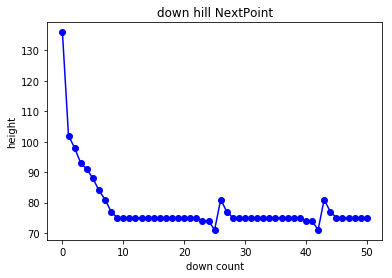

次のポイントの勾配リスト


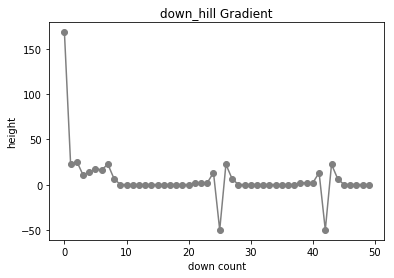

In [206]:

print('問題４のリストをグラフへ（次のポイントのリスト）')
plt.title("down hill NextPoint")
plt.xlabel("down count")
plt.ylabel("height")
plt.plot(destination_list,color='blue',marker="o")
plt.show()

# 繰返しごとの勾配をリストへ格納するため戻り値を書き換えた関数
def fuji_down_gradient(any_point=136):
    gradient_list = []

    for i in range(50):
        # y変化量
        change_elevation = fuji[:,3][int(any_point)] - fuji[:,3][int(any_point)-1] 
        # x変化量
        change_now_point = fuji[:,0][int(any_point)] - fuji[:,0][int(any_point)-1]
        # 勾配
        gradient = change_elevation / change_now_point
        
        # 次の地点
        next_point = any_point - 0.2 * gradient
        
        gradient_list.append(gradient)
        
        any_point = next_point
        
    return gradient_list

gradient_list = fuji_down_gradient(any_point=136)

print('次のポイントの勾配リスト')
plt.title("down_hill Gradient")
plt.xlabel("down count")
plt.ylabel("height")
plt.plot(gradient_list,color='gray',marker="o")
plt.show()

## 【問題6】初期値の変更


問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。

具体的には、「今いる地点」を変更できるようにするということです。

In [196]:
fuji_down_hill_100 = fuji_down_hill(any_point=100)
print("今いる地点を１００とした場合の、次の移動先のリスト{}".format(np.around(fuji_down_hill_100,1)))
fuji_down_hill_120 = fuji_down_hill(any_point=120)
print("今いる地点を１2０とした場合の、次の移動先のリスト{}".format(np.around(fuji_down_hill_120,1)))
fuji_down_hill_160 = fuji_down_hill(any_point=160)
print("今いる地点を１6０とした場合の、次の移動先のリスト{}".format(np.around(fuji_down_hill_160,1)))
fuji_down_hill_180 = fuji_down_hill(any_point=180)
print("今いる地点を１8０とした場合の、次の移動先のリスト{}".format(np.around(fuji_down_hill_180,1)))

今いる地点を１００とした場合の、次の移動先のリスト[100.   96.2  90.7  87.9  84.5  81.2  76.7  75.4  75.4  75.3  75.3  75.3
  75.2  75.2  75.2  75.2  75.1  75.1  75.1  75.   75.   75.   74.5  74.1
  73.7  71.1  81.   76.6  75.3  75.3  75.2  75.2  75.2  75.1  75.1  75.1
  75.   75.   75.   74.6  74.1  73.7  71.1  81.1  76.6  75.3  75.3  75.2
  75.2  75.2  75.1]
今いる地点を１2０とした場合の、次の移動先のリスト[120.  112.7 100.6  96.8  91.2  88.5  85.1  81.8  77.3  75.5  75.5  75.4
  75.4  75.4  75.4  75.3  75.3  75.3  75.2  75.2  75.2  75.1  75.1  75.1
  75.1  75.   75.   74.6  74.1  73.7  71.1  81.1  76.6  75.3  75.3  75.2
  75.2  75.2  75.2  75.1  75.1  75.1  75.   75.   75.   74.5  74.1  73.7
  71.   81.   76.6]
今いる地点を１6０とした場合の、次の移動先のリスト[160.  168.2 172.4 178.2 180.3 186.  158.8 165.4 172.1 177.9 179.  181.1
 182.7 185.7 158.5 165.1 171.7 179.  181.  182.6 185.6 158.5 165.  171.7
 178.9 181.  182.6 185.6 158.4 165.  170.4 174.7 177.3 178.4 180.5 186.2
 164.2 169.6 173.4 176.4 177.2 178.2 180.3 186.  164.1 169.5 173.3 176.2
 177.  17

## 【問題7】初期値ごとの下山過程の可視化


問題6では全初期値の下山過程を計算しました。

そこで、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。

勾配降下法において 初期値 が結果に影響を与えることが確認できます。


**《初期値とは》**

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なる斜面を下ることになります。

-----初期値が１００の場合のグラフ-----


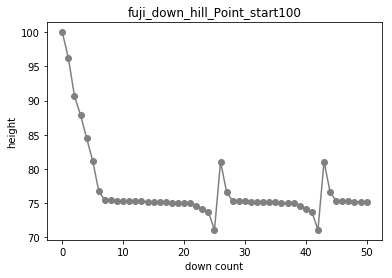

-----初期値が１2０の場合のグラフ-----


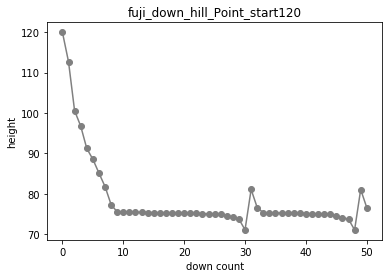

-----初期値が１6０の場合のグラフ-----


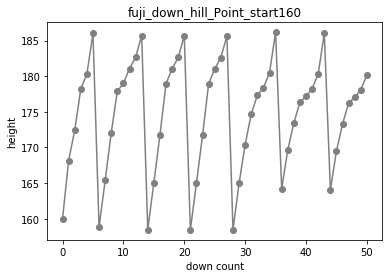

-----初期値が１8０の場合のグラフ-----


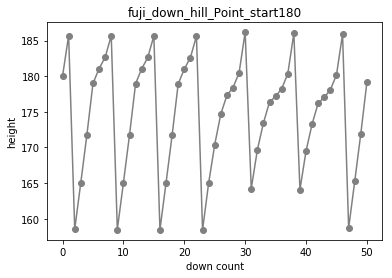

In [201]:
# 回答
print('-----初期値が１００の場合のグラフ-----')
plt.title("fuji_down_hill_Point_start100")
plt.xlabel("down count")
plt.ylabel("height")
plt.plot(fuji_down_hill_100,color='gray',marker="o")
plt.show()

print('-----初期値が１2０の場合のグラフ-----')
plt.title("fuji_down_hill_Point_start120")
plt.xlabel("down count")
plt.ylabel("height")
plt.plot(fuji_down_hill_120,color='gray',marker="o")
plt.show()
print('-----初期値が１6０の場合のグラフ-----')
plt.title("fuji_down_hill_Point_start160")
plt.xlabel("down count")
plt.ylabel("height")
plt.plot(fuji_down_hill_160,color='gray',marker="o")
plt.show()
print('-----初期値が１8０の場合のグラフ-----')
plt.title("fuji_down_hill_Point_start180")
plt.xlabel("down count")
plt.ylabel("height")
plt.plot(fuji_down_hill_180,color='gray',marker="o")
plt.show()

## 【問題8】（アドバンス問題）ハイパーパラメータの変更

ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。

そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

-----ハイパーパラメータ(学習率)を0.4に変更した場合の次の地点へのグラフ（初期地点は１３６）-----


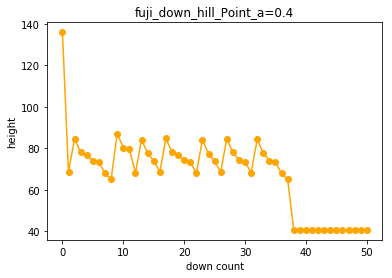

In [211]:
# αを0.４とした場合の関数（問題４の関数を書き換えた）
def fuji_down_gradient_q8(any_point=136):
    """ 任意の地点を入力、次の移動先地点をリストへ格納して出力する関数
    Parameters
        最初の地点:int
        any_point: 136
    
    return
        次の地点を繰り返し格納するリスト
        destination_list = []
    """
    destination_list = [any_point]
    # 仮に３０回繰り返すこととする
    for i in range(50):
        # y変化量
        change_elevation = fuji[:,3][int(any_point)] - fuji[:,3][int(any_point)-1] 
        # x変化量
        change_now_point = fuji[:,0][int(any_point)] - fuji[:,0][int(any_point)-1]
        # 勾配
        gradient = change_elevation / change_now_point
        
        # 次の地点
        next_point = any_point - 0.4 * gradient
        
        destination_list.append(next_point)
        
        any_point = next_point
        
    return destination_list

gradient_list_q8 = fuji_down_gradient_q8(any_point=136)

# 回答
print('-----ハイパーパラメータ(学習率)を0.4に変更した場合の次の地点へのグラフ（初期地点は１３６）-----')
plt.title("fuji_down_hill_Point_a=0.4")
plt.xlabel("down count")
plt.ylabel("height")
plt.plot(gradient_list_q8,color='orange',marker="o")
plt.show()
